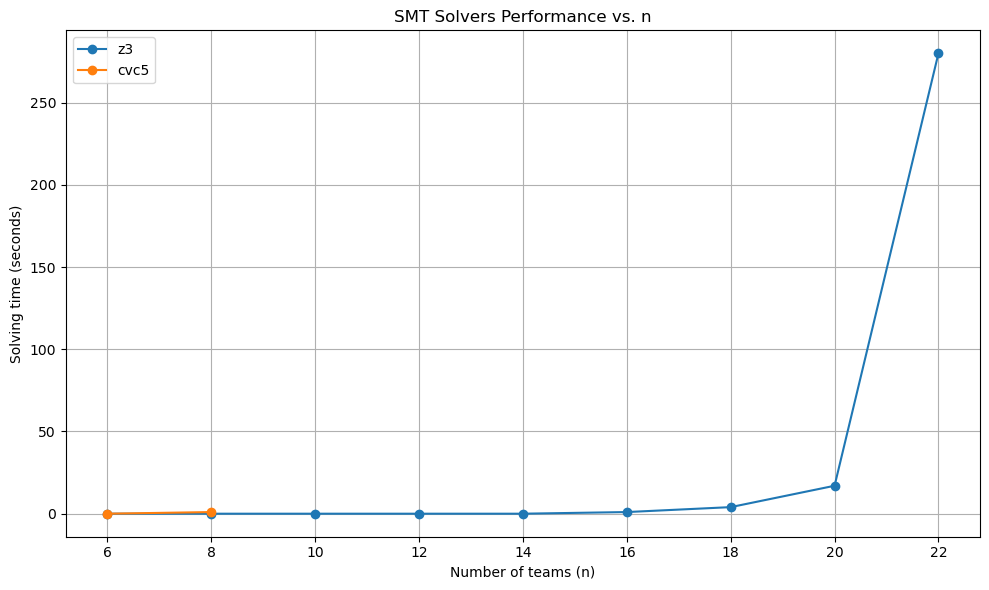

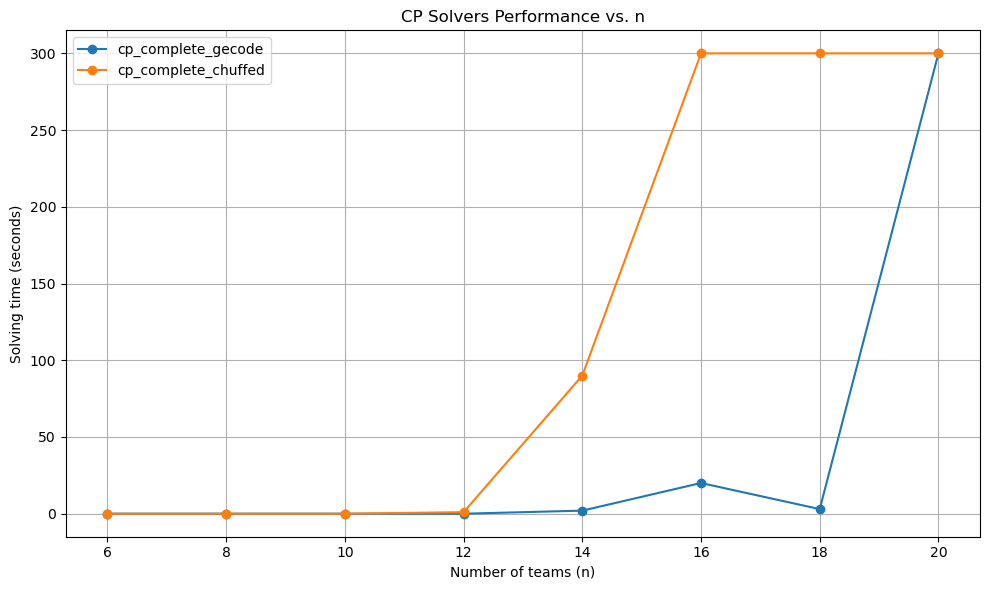

In [4]:
import os
import json
import matplotlib.pyplot as plt

base_folder = "res/"

for technique in os.listdir(base_folder):
    technique_folder = os.path.join(base_folder, technique)
    if not os.path.isdir(technique_folder):
        continue

    solver_data = {}

    for filename in os.listdir(technique_folder):
        if filename.endswith(".json"):
            n = int(filename.split('.')[0])
            filepath = os.path.join(technique_folder, filename)
            with open(filepath, 'r') as f:
                data = json.load(f)
                for solver, result in data.items():
                    time = result['time']
                    if solver not in solver_data:
                        solver_data[solver] = {'n': [], 'time': []}
                    solver_data[solver]['n'].append(n)
                    solver_data[solver]['time'].append(time)

    plt.figure(figsize=(10, 6))
    for solver, values in solver_data.items():
        sorted_pairs = sorted(zip(values['n'], values['time']))
        sorted_n, sorted_time = zip(*sorted_pairs)
        plt.plot(sorted_n, sorted_time, marker='o', label=solver)

    plt.xlabel("Number of teams (n)")
    plt.ylabel("Solving time (seconds)")
    plt.title(f"{technique} Solvers Performance vs. n")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
